<h1>Task 1 <h1><br>
<h4><B>What is a Structured Array in NumPy?</B><Br>

A structured array in NumPy is a type of array that allows you to define and store heterogeneous data types (e.g., integers, floats, strings) in a tabular format, similar to a table in a database or a DataFrame in pandas. Each "column" has a name and a data type, and the rows can store different kinds of values.</h4>

In [3]:
import numpy as np

In [ ]:
# i was using str in name as a datatype but there is not output apear to me so by search 
# i changed it to U10 (it's the unicode for str to deal it when making structurd array)
col = [
    ('name', 'U10'), 
    ('height', float),  
    ('class', int)    
]

students_data = np.array([
    ('ALi', 174, 10),
    ('ayman', 182, 11),
    ('amr', 180, 10),
    ('khaled', 170, 4),
    ('nada', 155, 5)
], dtype=col)

sort_height = np.sort(students_data, order = 'height')

print("sorting student by height")
print(sort_height)


sorting student by height
[('nada', 155.,  5) ('khaled', 170.,  4) ('ALi', 174., 10)
 ('amr', 180., 10) ('ayman', 182., 11)]


<b><h2>Task 2</h2></b><br>

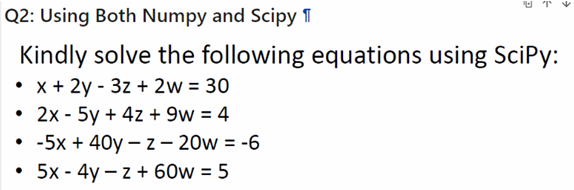

In [30]:
# Solving it using numpy 

x = np.array([[1,2,-3,2],
              [2,-5,4,9],
              [-5,40,-1,-1],
              [5,-4,-1,60]])

y = np.array([30,4,-6,5])

start = time.time()
z = np.linalg.solve(x,y)
end = time.time()

print(end - start)     # hna kont bshof el speed bta3 el numpy
print(z)

0.00020933151245117188
[19.92956387  2.23298598 -2.85224495 -1.47613534]


In [31]:
#  Solving it using Scipy

from scipy.linalg import solve

x = np.array([[1,2,-3,2],
              [2,-5,4,9],
              [-5,40,-1,-1],
              [5,-4,-1,60]])

y = np.array([30,4,-6,5])

start = time.time()
z = solve(x,y)
end = time.time()

print(end - start)
print(z)

0.00023698806762695312
[19.92956387  2.23298598 -2.85224495 -1.47613534]


<h1>Task 3</h1> <br>

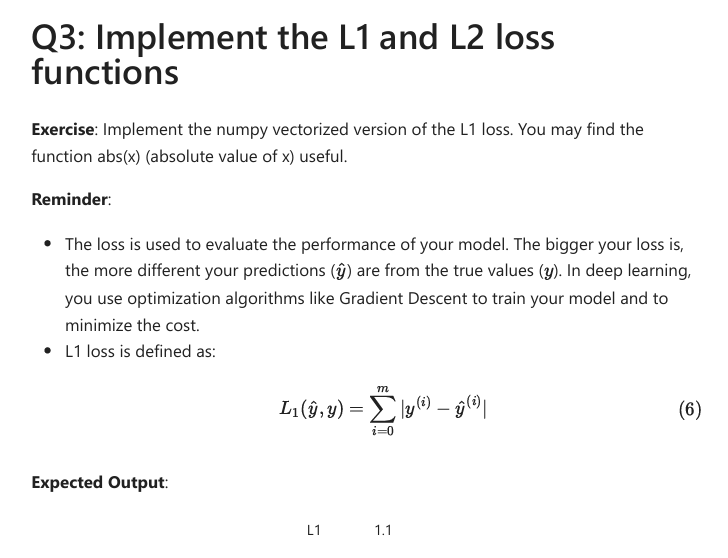

In [35]:
def L1(yhat,y):
    loss =  np.sum(np.abs(y - yhat))
    return loss

def L2(yhat,y):
    loss =  np.sum(np.abs(y - yhat)**2)
    return loss 

In [37]:
yhat = np.array([.9, 0.2, 0.1, .4, .9])
y = np.array([1 ,  0 ,  0 ,  1, 1])

l1_loss = L1(yhat,y)
l2_loss = L2(yhat,y)

print(f"l1 loss = {l1_loss}")
print(f"l2 loss = {l2_loss}")

l1 loss = 1.1
l2 loss = 0.43


<h1>Task 4<h1>

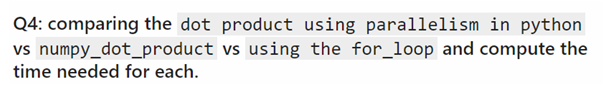

In [ ]:
import time

arr = np.random.rand(1000_000)
arr2 = np.random.rand(1000_000)

# Result for   >>>   using for loop 
def dot_product_loop(arr,arr2):
    result = 0
    for i in range(len(a)):
        result += arr[i] * arr2[i]
    return result

start = time.time()
loop_result = dot_product_loop(arr, arr2)
end = time.time()

Result = end - start
print(Result)

0.3835158348083496


In [22]:
# Result for    >>>    Using numpy.dot
start = time.time()
dotTime = np.dot(arr, arr2)
end = time.time()

Result = end - start
print(Result)


0.0013489723205566406


In [ ]:
from concurrent.futures import ThreadPoolExecutor
# Result 3 >>>>>>  Using parallelism

# function i made to calculate dot product for a slice
def slice_dot(start, end):
    return np.dot(arr[start:end], arr2[start:end])


def parallel_dot(arr, arr2, num_threads=5):
    batch = len(arr) // num_threads    # hna b divide array 3la el threads ely 3ndy
    thre_res = []   # list 3shna a store threads results
    with ThreadPoolExecutor(max_workers=num_threads) as executor:
        for i in range(num_threads):
            start = i * batch
            end = (i + 1) * batch if i != num_threads - 1 else len(arr)   #3shan bs lw a5r batch msh = ely ablo lw el samples msh divisable by 5 f b5ly end a5r batch b len(arr)
            thre_res.append(executor.submit(slice_dot, start, end))
    return sum(f.result() for f in thre_res)


start = time.time()
parallel_result = parallel_dot(arr, arr2)
end = time.time()

parallel_time = end - start
print(parallel_time)    

0.004025697708129883
